# Step through test case examples of normal mode analysis

In [1]:
from simple_model_examples import *

## 2D: Equilateral triange

### Draw inital normal mode results

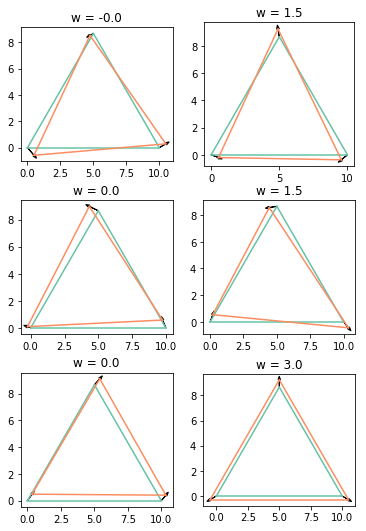

In [2]:
model = '2D_tr'
verts, faces, hess, w, v = nma_test_model(model)
draw_init_modes(verts, model_faces[model], v, w)

### Project out x and y translation from zero-energy modes

In [3]:
def project_out_vectors(init_mode, vx, vy):
    return np.array([init_mode[j] - np.dot(vx,init_mode)*vx[j] - np.dot(vy,init_mode)*vy[j] for j in range(len(init_mode))])

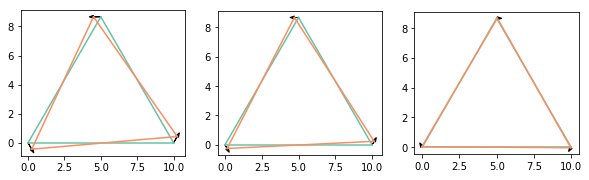

In [4]:
vx = [1, 1, 1, 0, 0, 0]
vx /= np.sqrt(np.sum(vx))
vy = [0, 0, 0, 1, 1, 1]
vy /= np.sqrt(np.sum(vy))

fig, ax = plt.subplots(figsize=[10,30], nrows=1, ncols=3)
for i in range(0,3):
    draw_mode(verts, faces, project_out_vectors(v[:,i], vx, vy), ax[i])

### Project out expected behavior (plotted) from middle mode

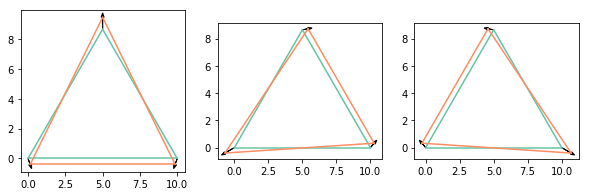

In [5]:
a = 0.8
b = np.sqrt((1-(a**2)-2*((a/2)**2))/2)
vl1 = [-b, 0, b, -a/2, a, -a/2]

def rotate_mode(vv, theta):
    vr = []
    npts = int(len(vv)/2)
    for i in range(npts*2):
        if i < npts:
            vr.append(vv[i]*np.cos(theta)-vv[i+npts]*np.sin(theta))
        else:
            vr.append(vv[i]*np.cos(theta)+vv[i-npts]*np.sin(theta))
    return vr

vl2p = rotate_mode(vl1, np.pi*2/3)
vl2 = [vl2p[2], vl2p[0], vl2p[1], vl2p[5], vl2p[3], vl2p[4]]

vl3p = rotate_mode(vl1, -np.pi*2/3)
vl3 = [vl3p[1], vl3p[2], vl3p[0], vl3p[4], vl3p[5], vl3p[3]]
vl = [vl1,vl2,vl3]

fig, ax = plt.subplots(figsize=[10,30], nrows=1, ncols=3)
for i in range(3):
    draw_mode(verts, faces, vl[i], ax[i])

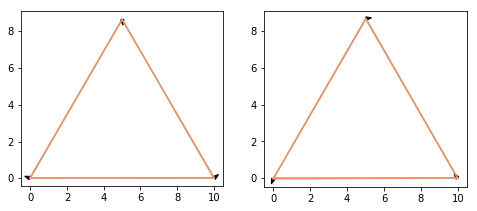

In [6]:
fig, ax = plt.subplots(figsize=[8,16], nrows=1, ncols=2)
init_mode = [v[:,3], v[:,4]]
for i in range(2):
    new_mode = np.array([init_mode[i][j] - np.dot(vl1,init_mode[i])*vl1[j] - np.dot(vl2,init_mode[i])*vl2[j] - np.dot(vl3,init_mode[i])*vl3[j] for j in range(len(init_mode[i]))])
    draw_mode(verts, faces, new_mode, ax[i])

## 2D: Square

### Draw inital normal mode results

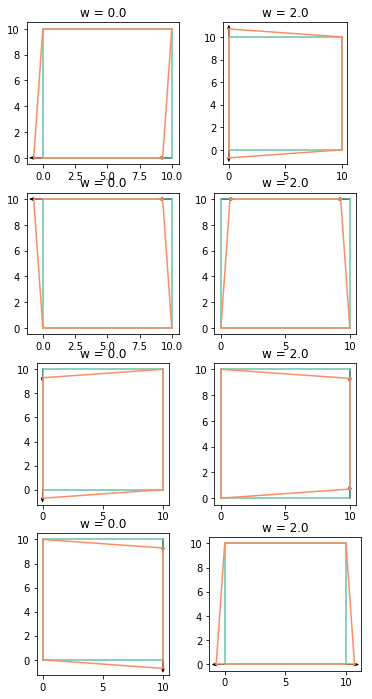

In [7]:
model = '2D_sq'
verts, faces, hess, w, v = nma_test_model(model)
draw_init_modes(verts, faces, v, w)

### Project out x and y translation from zero energy modes

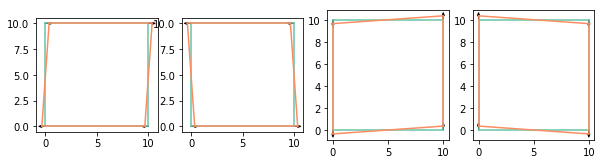

In [8]:
vx = [0.5, 0.5, 0.5, 0.5, 0, 0, 0, 0]
vy = [0, 0, 0, 0, 0.5, 0.5, 0.5, 0.5]

fig, ax = plt.subplots(figsize=[10,40], nrows=1, ncols=4)
for i in range(0,4):
    draw_mode(verts, faces, project_out_vectors(v[:,i], vx, vy), ax[i])

### Project out x and y stretching from remaining modes

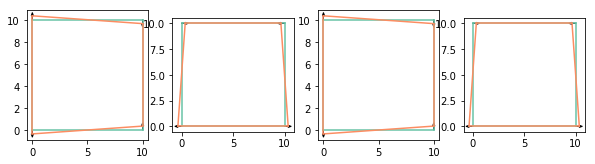

In [9]:
vsy = [0, 0, 0, 0, -0.5, 0.5, 0.5, -0.5]
vsx = [-0.5, -0.5, 0.5, 0.5, 0, 0, 0, 0]

fig, ax = plt.subplots(figsize=[10,40], nrows=1, ncols=4)
for i in range(4,8):
    draw_mode(verts, faces, project_out_vectors(v[:,i], vsx, vsy), ax[i-4])

## 2D: Fully-connected Square

### Draw inital normal mode results

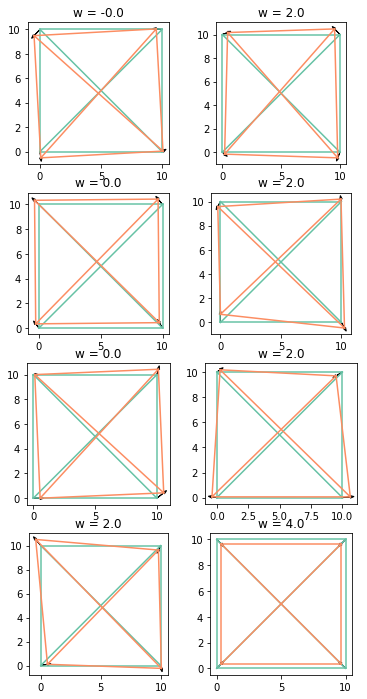

In [10]:
model = '2D_sq'
verts, faces, hess2, w2, v2 = nma_test_model(model='2D_sq', verts=None, faces=None, fully_connect=True)
draw_init_modes(verts, faces, v2, w2)

### Project out x and y translation from zero energy modes

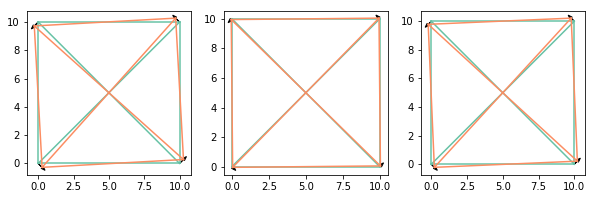

In [11]:
fig, ax = plt.subplots(figsize=[10,30], nrows=1, ncols=3)
for i in range(0,3):
    draw_mode(verts, faces, project_out_vectors(v2[:,i], vx, vy), ax[i])

## 2D: Rectangle

### Draw initial normal mode results

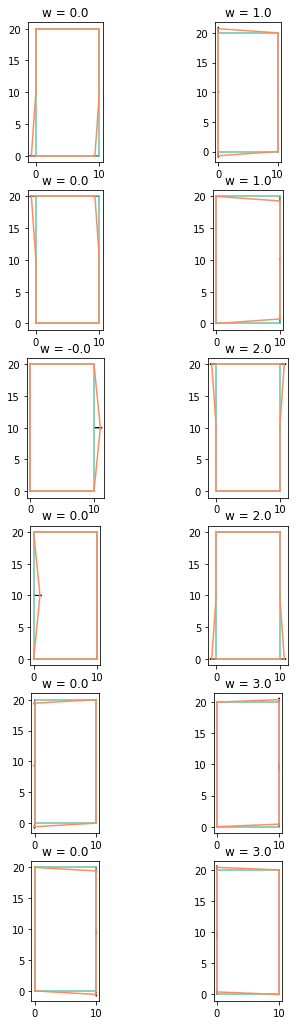

In [12]:
model = '2D_rt2'
verts, faces, hess, w, v = nma_test_model(model)
draw_init_modes(verts, faces, v, w)

### Project out x and y translation from zero energy modes

In [13]:
vx = np.array([1, 1, 1, 1, 1, 1, 0,  0, 0, 0, 0, 0])/np.sqrt(6)
vy = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])/np.sqrt(6)
vsy = np.array([0, 0, 0, 0, 0, 0,  -1, 0, 1, 1, 0, -1])/np.sqrt(4)
vsx = np.array([-1, -1, -1, 1, 1, 1, 0, 0, 0, 0, 0, 0])/np.sqrt(6)

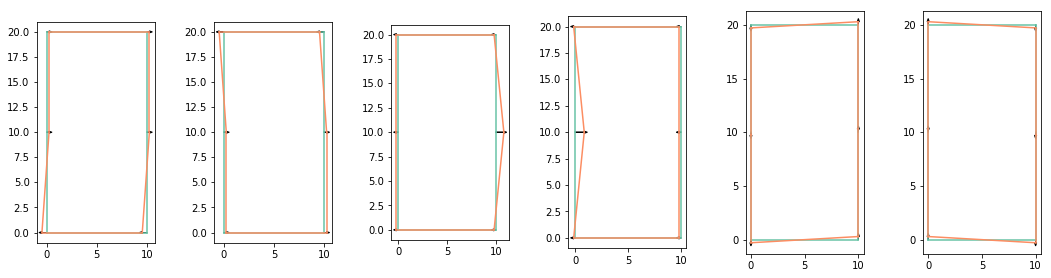

In [14]:
fig, ax = plt.subplots(figsize=[18,18*6], nrows=1, ncols=6)
plt.subplots_adjust(wspace=0.5)
for i in range(6):
    draw_mode(verts, faces, project_out_vectors(v[:,i], vx, vy), ax[i])

### Project out x and y stretching from remaining modes

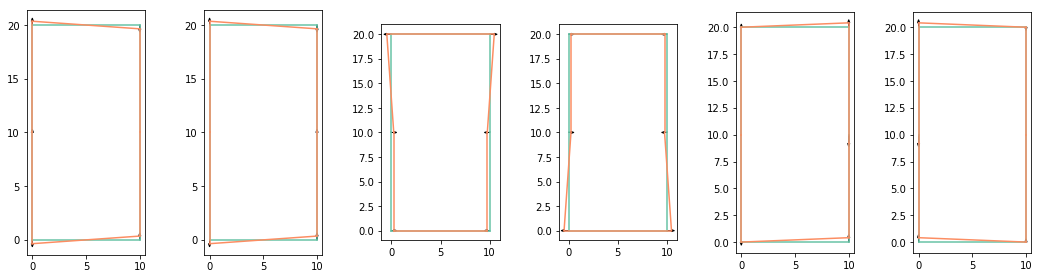

In [15]:
fig, ax = plt.subplots(figsize=[18,18*6], nrows=1, ncols=6)
plt.subplots_adjust(wspace=0.5)
for i in range(6,12):
    draw_mode(verts, faces, project_out_vectors(v[:,i], vsx, vsy), ax[i-6])

## 2D: Fully-connected Rectangle 

### Draw inital normal mode analysis results

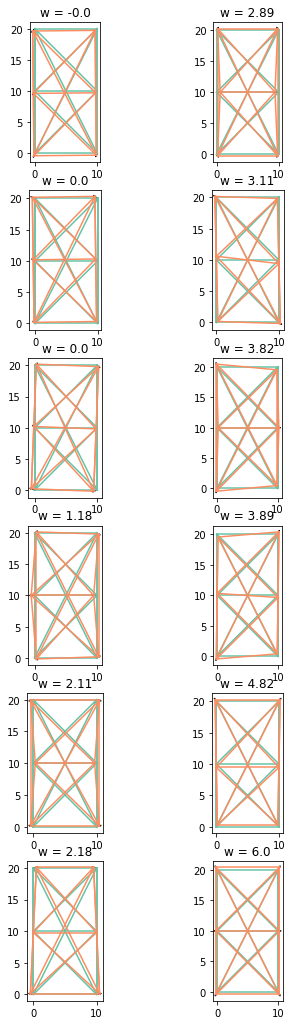

In [16]:
model = '2D_rt2'
verts, faces, hess, w, v = nma_test_model(model, None, None, True)
draw_init_modes(verts, faces, v, w)

## 2D: Pentagon

### Draw inital normal mode results and plot histogram of eigenvalues

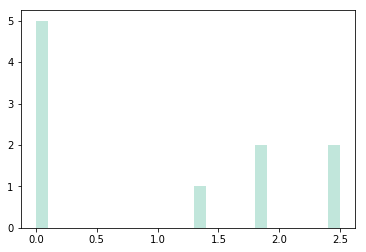

<Figure size 432x288 with 0 Axes>

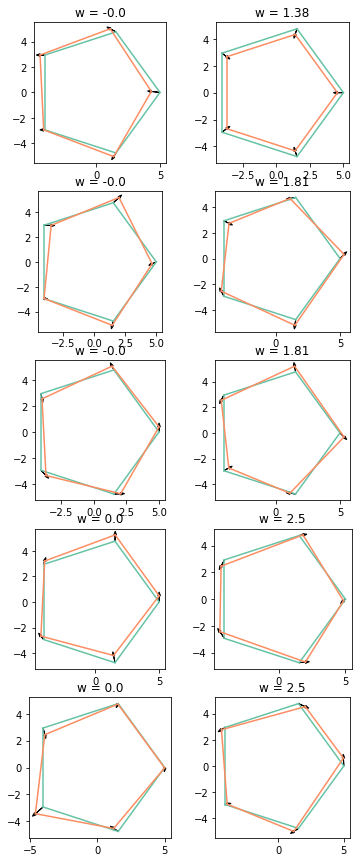

In [17]:
w, v = nma_polygon(5,5, False, True)

## 2D: Fully-connected Pentagon

### Draw inital normal mode results and plot histogram of eigenvalues

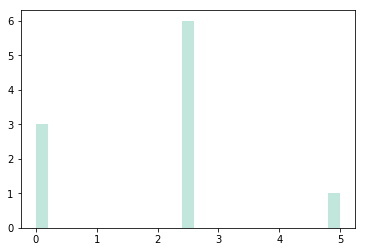

<Figure size 432x288 with 0 Axes>

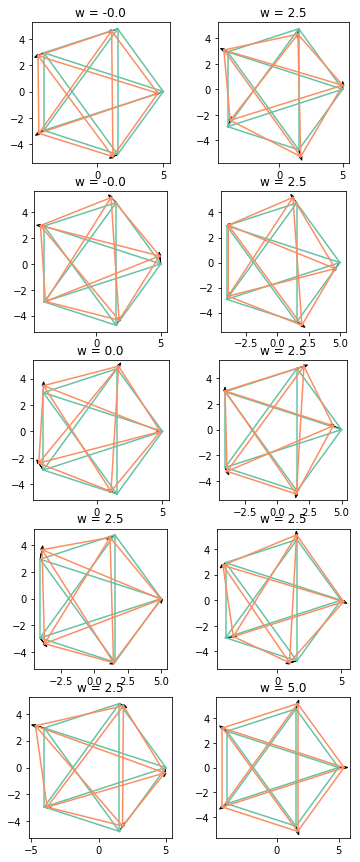

In [18]:
w, v = nma_polygon(5,5, True, True)

## 2D: Comparison of eigenvalues for edge-connected and fully-connected 100-sided polygon

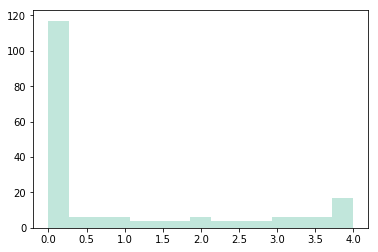

In [32]:
w, v = nma_polygon(5,100, False, False)
sb.distplot(w, kde=False, bins=15)

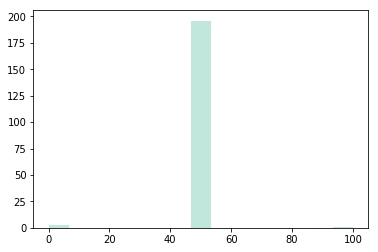

In [20]:
w2, v2 = nma_polygon(5,100, True, False)
sb.distplot(w2, kde=False, bins=15)

## 3D: Comparison of edge-connected and fully-connected cube

In [21]:
model = '3D_cb'
verts, faces, hess, w, v = nma_test_model(model)

In [22]:
model = '3D_cb'
verts2, faces2, hess2, w2, v2 = nma_test_model(model = model, verts=None, faces=None, fully_connect=True)

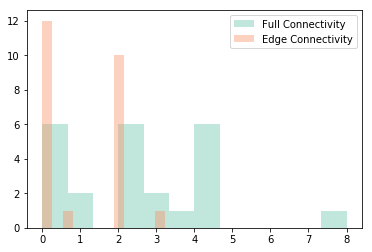

In [28]:
sb.distplot(w2, kde=False, bins=12, label='Full Connectivity')
sb.distplot(w, kde=False, bins=12, label='Edge Connectivity')
plt.legend()